# Week 3 Assignment: Chinook Music Store


This week's assignment involves analysing data from the Chinook database to gain insights about their store, their customers and employees, and their invoice information. To do this, the data will be analysed to answer a number of questions.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('tableau-colorblind10')



## 1. Which city has the best customers?

The objective is to find the city with the highest revenue that will host a promotional music festival.


In [ ]:
# Loading and previewing the invoice data
invoice = pd.read_csv("Invoice.csv")
invoice.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,NaN,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98
1,2,4,NaN,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96
2,3,8,NaN,Grétrystraat 63,Brussels,NaN,Belgium,1000,5.94
3,4,14,NaN,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,NaN,69 Salem Street,Boston,MA,USA,2113,13.86


In [ ]:
# City with the highest revenue
invoice[['BillingCity', 'Total']].groupby('BillingCity').sum().sort_values(by = 'Total', ascending = False).head(1)

,Total
BillingCity,
Prague,90.24


### Plot: Total Revenue by City

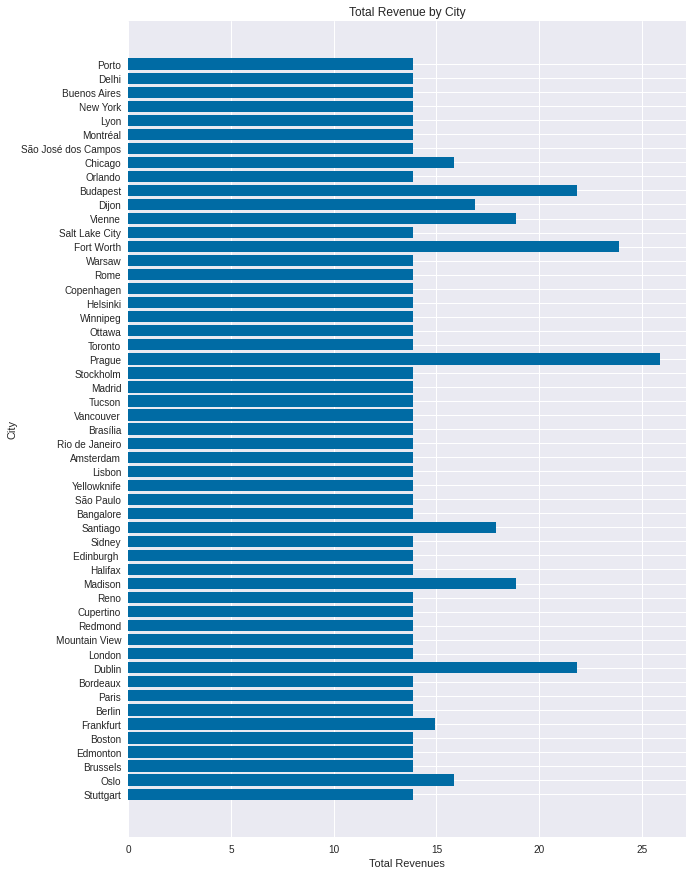

In [ ]:
# Plotting total revenue from each city
plt.figure(figsize=(10,15))
plt.barh('BillingCity', 'Total', data=invoice)
plt.xlabel('Total Revenues')
plt.ylabel('City')
plt.title('Total Revenue by City')
plt.show()

The music festival should be held in Prague as it has the best customers according to invoice totals.

## 2. Which countries have the most invoices?

The objective is to find the countries with the highest number of transactions.

In [ ]:
# Country with the most invoices
country_totals = invoice['BillingCountry'].value_counts().to_frame(name='invoices')
country_totals

,invoices
USA,91
Canada,56
Brazil,35
France,35
Germany,28
United Kingdom,21
Portugal,14
Czech Republic,14
India,13
Ireland,7


### Plot: Total Number of Invoices by Country

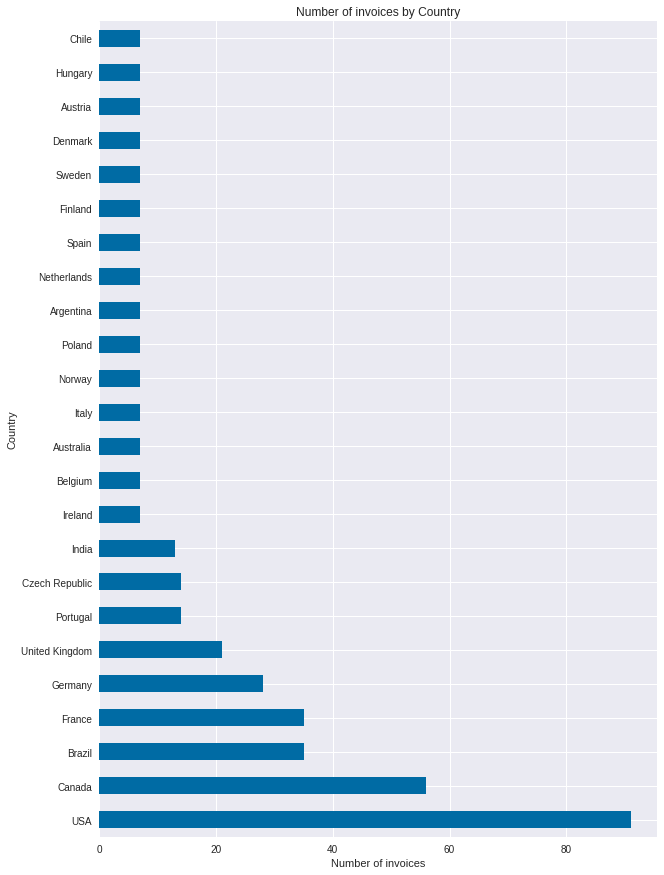

In [ ]:
# Plotting number of invoices per country
plt.figure(figsize=(10,15))
invoice['BillingCountry'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of invoices')
plt.ylabel('Country')
plt.title('Number of invoices by Country')
plt.show()

The countries with the most invoices are USA, Canada, France, Brazil, Germany, United Kingdom, Czech Republic, Portugal and India.

## 3. Who is the best customer?

Finding the customer that spent the most money.

In [ ]:
# Highest spending customer
invoice[['CustomerId', 'Total']].groupby('CustomerId')['Total'].sum().sort_values(ascending = False).head(1)

CustomerId
6    49.62
Name: Total, dtype: float64

### Plot: Total Revenue Per Customer

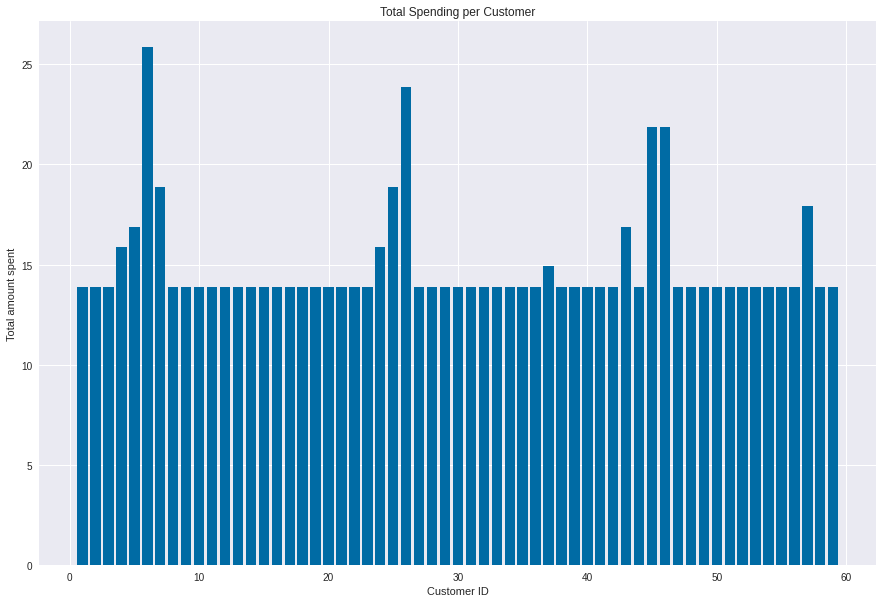

In [ ]:
# Plotting the total amount spent by each customer
plt.figure(figsize = (15,10))
plt.bar(invoice['CustomerId'], invoice['Total'])
plt.title('Total Spending per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total amount spent')
plt.show()

The customer with ID number 6 is the highest spender. We can get the customer details from the database.

In [ ]:
# Customer data
customers = pd.read_csv('Customer.csv')
customers.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,NaN,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,+49 0711 2842222,NaN,leonekohler@surfeu.de,5
2,3,François,Tremblay,NaN,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,NaN,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,NaN,Ullevålsveien 14,Oslo,NaN,Norway,0171,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,NaN,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [ ]:
# Best customer details
customers[customers['CustomerId'] == 6]

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
5,6,Helena,Holý,NaN,Rilská 3174/6,Prague,NaN,Czech Republic,14300,+420 2 4177 0449,NaN,hholy@gmail.com,5


The best customer is Helena Holý from Prague.

## 4. Rock Music Listeners

The objective is to find the names and email addresses of customers that listen to rock music.

In [ ]:
# Genre data
genre = pd.read_csv('Genre.csv')
genre.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [ ]:
# Track data
tracks = pd.read_csv('Track.csv')
tracks.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,NaN,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [ ]:
# Track purchase invoice line items
line_items = pd.read_csv('InvoiceLine.csv')
line_items.head()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


First, the genre for each track should be obtained from the genre dataframe.

In [ ]:
# Genre and track data
gt = pd.merge(tracks[['TrackId', 'GenreId']], genre, on = 'GenreId', how = 'left')
gt.head()

,TrackId,GenreId,Name
0,1,1,Rock
1,2,1,Rock
2,3,1,Rock
3,4,1,Rock
4,5,1,Rock


These track details can now be matched to the customers by combining data on the customer ID for each purchase, the tracks purchased in their transactions, and the genre of the tracks purchased.

In [ ]:
# Invoice details with customer ID
purchases = pd.merge(line_items[['InvoiceId', 'TrackId']], invoice[['InvoiceId', 'CustomerId']], on = 'InvoiceId', how = 'left')
purchases.head(10)

,InvoiceId,TrackId,CustomerId
0,1,2,2
1,1,4,2
2,2,6,4
3,2,8,4
4,2,10,4
5,2,12,4
6,3,16,8
7,3,20,8
8,3,24,8
9,3,28,8


In [ ]:
# All invoice details
all_invoices = pd.merge(purchases, gt, on = 'TrackId', how = 'left')
all_invoices.head(10)

,InvoiceId,TrackId,CustomerId,GenreId,Name
0,1,2,2,1,Rock
1,1,4,2,1,Rock
2,2,6,4,1,Rock
3,2,8,4,1,Rock
4,2,10,4,1,Rock
5,2,12,4,1,Rock
6,3,16,8,1,Rock
7,3,20,8,1,Rock
8,3,24,8,1,Rock
9,3,28,8,1,Rock


In [ ]:
# Customer names and email addresses
customer_info = customers[['CustomerId', 'Email', 'FirstName', 'LastName']]
customer_info.head()

,CustomerId,Email,FirstName,LastName
0,1,luisg@embraer.com.br,Luís,Gonçalves
1,2,leonekohler@surfeu.de,Leonie,Köhler
2,3,ftremblay@gmail.com,François,Tremblay
3,4,bjorn.hansen@yahoo.no,Bjørn,Hansen
4,5,frantisekw@jetbrains.com,František,Wichterlová


The customer IDs can be linked to the genres of tracks that they purchased.

In [ ]:
# Final table with customer and genre details
all_customers = pd.merge(all_invoices[['CustomerId', 'Name']], customer_info, on = 'CustomerId', how = 'left')
all_customers.head()

,CustomerId,Name,Email,FirstName,LastName
0,2,Rock,leonekohler@surfeu.de,Leonie,Köhler
1,2,Rock,leonekohler@surfeu.de,Leonie,Köhler
2,4,Rock,bjorn.hansen@yahoo.no,Bjørn,Hansen
3,4,Rock,bjorn.hansen@yahoo.no,Bjørn,Hansen
4,4,Rock,bjorn.hansen@yahoo.no,Bjørn,Hansen


In [ ]:
# Selecting contacts for customers that listen to rock music
all_customers[all_customers['Name'] == 'Rock'].sort_values(by = 'Email', ascending = True).drop_duplicates(ignore_index = True)

,CustomerId,Name,Email,FirstName,LastName
0,32,Rock,aaronmitchell@yahoo.ca,Aaron,Mitchell
1,11,Rock,alero@uol.com.br,Alexandre,Rocha
2,7,Rock,astrid.gruber@apple.at,Astrid,Gruber
3,4,Rock,bjorn.hansen@yahoo.no,Bjørn,Hansen
4,39,Rock,camille.bernard@yahoo.fr,Camille,Bernard
5,8,Rock,daan_peeters@apple.be,Daan,Peeters
6,56,Rock,diego.gutierrez@yahoo.ar,Diego,Gutiérrez
7,20,Rock,dmiller@comcast.com,Dan,Miller
8,40,Rock,dominiquelefebvre@gmail.com,Dominique,Lefebvre
9,30,Rock,edfrancis@yachoo.ca,Edward,Francis


### Plot: Number of Purchases per Customer by Genre 

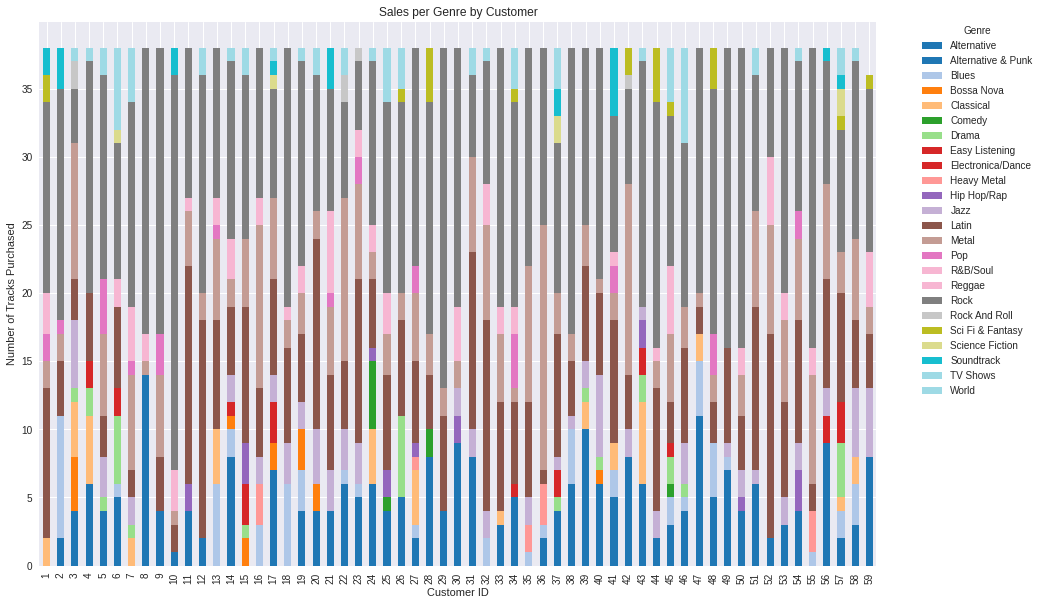

In [ ]:
# Plotting the genres of tracks purchased for each customer
fig, ax = plt.subplots(figsize=(15,10))
all_invoices.groupby(['CustomerId','Name']).count()['GenreId'].unstack().plot(kind = 'bar', stacked = True, ax=ax, cmap = "tab20")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title = 'Genre')
plt.xlabel('Customer ID')
plt.ylabel('Number of Tracks Purchased')
plt.title('Sales per Genre by Customer')
plt.show()
plt.show()

All customers purchased rock music tracks.

## 5. Most popular music genre for each country

The objective is to find the most popular genre in each country, which is the genre with the highest amount of purchases.

In [ ]:
# Checking that each line item on the invoice only has a single track purchased
line_items.describe()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
mean,1120.500000,206.868750,1717.734375,1.039554,1.0
std,646.776623,119.134877,993.797999,0.217069,0.0
min,1.000000,1.000000,1.000000,0.990000,1.0
25%,560.750000,103.000000,874.000000,0.990000,1.0
50%,1120.500000,207.000000,1708.000000,0.990000,1.0
75%,1680.250000,311.000000,2560.000000,0.990000,1.0
max,2240.000000,412.000000,3500.000000,1.990000,1.0


All lines have only one item purchased, so the unit price is the total for each line item.

First, invoice line items can be matched to customers.

In [ ]:
# Adding customer ID to line items
customer_purchase = pd.merge(line_items, invoice[['InvoiceId', 'CustomerId', 'BillingCountry']], on = 'InvoiceId', how = 'left')
customer_purchase.head()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,CustomerId,BillingCountry
0,1,1,2,0.99,1,2,Germany
1,2,1,4,0.99,1,2,Germany
2,3,2,6,0.99,1,4,Norway
3,4,2,8,0.99,1,4,Norway
4,5,2,10,0.99,1,4,Norway


The dataframe can now be completed by adding the genre for each track purchased.

In [ ]:
# Merging genre data
customer_purchase = pd.merge(customer_purchase, gt, on = 'TrackId', how = 'left')
customer_purchase.head()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,CustomerId,BillingCountry,GenreId,Name
0,1,1,2,0.99,1,2,Germany,1,Rock
1,2,1,4,0.99,1,2,Germany,1,Rock
2,3,2,6,0.99,1,4,Norway,1,Rock
3,4,2,8,0.99,1,4,Norway,1,Rock
4,5,2,10,0.99,1,4,Norway,1,Rock


The total revenue from purchases of tracks can be calculated by genre for every country.

In [ ]:
# Revenue totals for each country by genre
genre_totals = pd.DataFrame(customer_purchase.groupby(['BillingCountry', 'Name'], as_index=False)['UnitPrice'].sum())
genre_totals.head()

,BillingCountry,Name,UnitPrice
0,Argentina,Alternative & Punk,8.91
1,Argentina,Easy Listening,1.98
2,Argentina,Jazz,1.98
3,Argentina,Latin,7.92
4,Argentina,Metal,6.93


We can now find the highest revenue from a single genre for each country.

In [ ]:
# Highest total for each country
max_totals = pd.DataFrame(genre_totals.groupby('BillingCountry', as_index=False)['UnitPrice'].max())
max_totals.head()

,BillingCountry,UnitPrice
0,Argentina,8.91
1,Australia,21.78
2,Austria,14.85
3,Belgium,20.79
4,Brazil,80.19


These totals can be used to find the genre(s) with the most purchases for each country.

In [ ]:
# Most popular genre by country
pd.merge(max_totals, genre_totals, on = ['UnitPrice', 'BillingCountry'], how = 'left')

,BillingCountry,UnitPrice,Name
0,Argentina,8.91,Alternative & Punk
1,Argentina,8.91,Rock
2,Australia,21.78,Rock
3,Austria,14.85,Rock
4,Belgium,20.79,Rock
5,Brazil,80.19,Rock
6,Canada,105.93,Rock
7,Chile,8.91,Rock
8,Czech Republic,24.75,Rock
9,Denmark,20.79,Rock


### Plot: Sales per Genre by Country

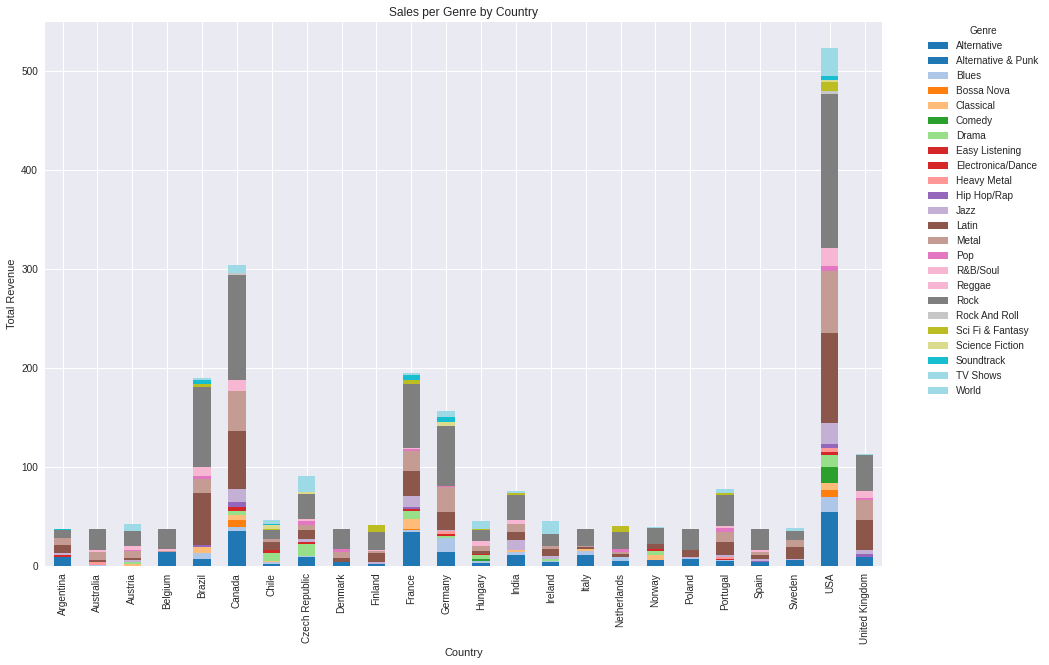

In [ ]:
# Plotting total revenue from each genre by country
fig, ax = plt.subplots(figsize=(15,10))
customer_purchase.groupby(['BillingCountry', 'Name'])['UnitPrice'].sum().unstack().plot(kind='bar', ax=ax, stacked = True, cmap = "tab20")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title = "Genre")
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Sales per Genre by Country')
plt.show()

Rock is the most popular genre overall. Argentina, Ireland and Sweden are the only countries where rock is not the most popular genre.